# Shop Customer - Regression

[**Data by SHRUTI_IYYER from Kaggle**](https://www.kaggle.com/datasets/shrutimechlearn/customer-data)

A project to predict the spending score with the Age, Sex and Annual Income. I will try different regression model and compare their performance.

*Import the most important libraries*

In [710]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

importing the Dataset

In [711]:
dataset = pd.read_csv('Customers.csv')
dataset.drop(columns=['CustomerID'], inplace=True)
dataset

,Genre,Age,Annual_Income_(k$),Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


Data-preprocessing: selecting the Genre, Age and Annual Income as independent variables X and the Spending Score as dependent variable y.

In [712]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Encode the categorical data of the Genre column, which has 'Female' and 'Male' as values. To avoid the dummy variable trap the first column of the transformed X is omitted. 

In [713]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X = X[:, 1:]

Splitting the dataset into a training set and test set. The test set will contain 40 values and the training set 160.

In [714]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Linear Regression

Training the **Multiple Linear Regression** model on the training set. 

In [715]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predicting the results of the test set.

In [716]:
y_pred = regressor.predict(X_test)



Checking R-squared: 

In [717]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.15451964144097086

The R-squared is at around 15.45 % which means that only 15.45 % of the Spending Score can be explained through the independent variables. From the plotting of the data in the clustering before this is a expected outcome because there was no linear correlation. 

In [718]:
import statsmodels.api as sm
X_sm = np.column_stack((X[:, 0].astype('int'), dataset['Age'], dataset['Annual_Income_(k$)']))
y_sm = dataset['Spending_Score']

X_sm = sm.add_constant(X_sm)
model = sm.OLS(y_sm, X_sm)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:         Spending_Score   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     7.960
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           4.91e-05
Time:                        21:31:02   Log-Likelihood:                -922.05
No. Observations:                 200   AIC:                             1852.
Df Residuals:                     196   BIC:                             1865.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.9300      6.642     11.130      0.0

x1 corresponds with the Genre, x2 with the Age and x3 with the Annual Income. The very large p-values of the first and third coefficient indicate that they are not statistically significant. The R-squared is at 10.9 % and the adjusted R-squared at 9.5 %. The difference of the R-squared from the model built with the scikitlearn LinearRegression could be explained by the random train-test-set-splits. The F-statistic, which is not that much greater than 1 at 7.960 indicated that there is not a very strong relationship between the dependent and independent variables. 

In [719]:
X_sm = dataset['Age']
y_sm = dataset['Spending_Score']

X_sm = sm.add_constant(X_sm)
model = sm.OLS(y_sm, X_sm)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         Spending_Score   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     23.74
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           2.25e-06
Time:                        21:31:02   Log-Likelihood:                -922.22
No. Observations:                 200   AIC:                             1848.
Df Residuals:                     198   BIC:                             1855.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.7012      5.124     14.384      0.0

By removing the first and third coefficient the R-squared has fallen to 10.7 % but the adjusted R-squared has risen to 10.3 %. 

## Polynominal Regression

Because the Age seemed to be the only statistically significant variable I will only use this coefficient moving forward. This will also allow be to visualize the results. 

In [720]:
X = np.sort(dataset.iloc[:, 1:2].values, 0)
y = np.sort(dataset.iloc[:, -1].values, 0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Create a matrix of the powered feature:

In [721]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_train.reshape(-1, 1))


Train the model with the powered feature: 

In [722]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

LinearRegression()

Predicting the results: 

In [723]:
y_pred = poly_reg.predict(poly.fit_transform(X_test.reshape(-1, 1)))

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9892477547201691

Displaying the results:

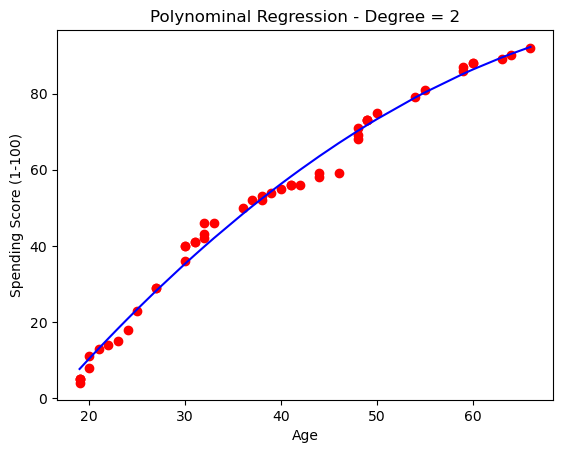

In [724]:
plt.scatter(X_test, y_test, color='red')
plt.plot(np.sort(X_test, 0), np.sort(y_pred, 0), color='blue')
plt.title('Polynominal Regression - Degree = 2')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

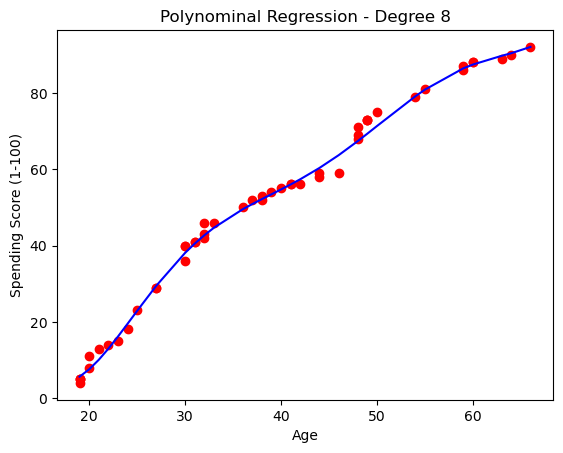

0.9953524450925304

In [725]:
poly = PolynomialFeatures(8)
X_poly = poly.fit_transform(X_train.reshape(-1, 1))

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

y_pred = poly_reg.predict(poly.fit_transform(X_test.reshape(-1, 1)))

plt.scatter(X_test, y_test, color='red')
plt.plot(np.sort(X_test, 0), np.sort(y_pred, 0), color='blue')
plt.title('Polynominal Regression - Degree 8')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

r2_score(y_test, y_pred)

## Support Vector Regression (SVR)

## Decision Tree Regression 

## Random Forest Regression 

## **Comparison**